#### Title: Time Series Analysis of Stock Prices
#### Author: Brian Castillo
#### Date: 13 Sep 2023

___________

In [7]:
import statsmodels
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
# Data Preprocessing
stockData = pd.read_csv('HistoricalData_1694642600489.csv') # Reading the data
stockData

,Date,Close/Last,Volume,Open,High,Low
0,09/12/2023,$176.30,90370190,$179.49,$180.13,$174.82
1,09/11/2023,$179.36,58953050,$180.07,$180.30,$177.34
2,09/08/2023,$178.18,65602070,$178.35,$180.239,$177.79
3,09/07/2023,$177.56,112488800,$175.18,$178.21,$173.54
4,09/06/2023,$182.91,81755820,$188.40,$188.85,$181.47
...,...,...,...,...,...,...
2511,09/19/2013,$16.8679,403247439,$16.8107,$16.9939,$16.7589
2512,09/18/2013,$16.5957,454546498,$16.5421,$16.6554,$16.4521
2513,09/17/2013,$16.2614,398818120,$15.9986,$16.4182,$15.9821
2514,09/16/2013,$16.0757,546255421,$16.4643,$16.4861,$15.9721


In [10]:
# Checking data types of the DataFrame
column_data_types = stockData.dtypes # Data is stored as an in columns named Date, Close/Last, Volume, Open, High, Low

In order to make the data usable, the object to lists must be converted to numerical types and the date needs to be converted into datetime format using pandas

In [11]:
# Converting to datetime format
stockDate = pd.to_datetime(stockData['Date'])
# Removing the dollar sign and converting it to numerical type
stockClosing = stockData['Close/Last'].str.replace('$', '', regex=False).astype(float)
stockVolume = stockData['Volume']
stockOpen = stockData['Open'].str.replace('$', '', regex=False).astype(float)
stockHigh = stockData['High'].str.replace('$', '', regex=False).astype(float)
stockLow = stockData['Low'].str.replace('$', '', regex=False).astype(float)

# Create a new DataFrame
stockDataFrame = pd.DataFrame({
    'Date': stockDate,
    'Close/Last': stockClosing,
    'Volume': stockVolume,
    'Open': stockOpen,
    'High': stockHigh,
    'Low': stockLow
})

In [12]:
# Checking for missing values
missing_values = stockData.isnull().sum()
missing_values

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

_______________________

### Exploratory Data Analysis 
Now that I have preprocessed the data, I am going visualize the data.

Lets take a look at 'Close/Last' prices over time

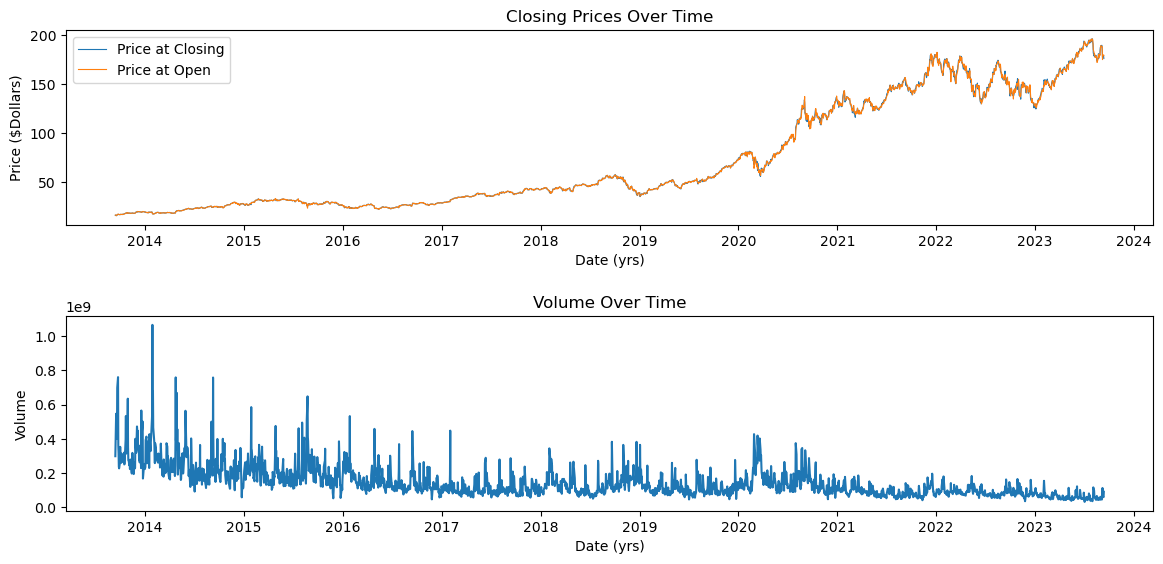

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(2, 1, 1)
plt.plot(stockDate,stockClosing, linewidth=.8, label = 'Price at Closing')
plt.plot(stockDate,stockOpen, linewidth=.8, label = 'Price at Open')
plt.title('Closing Prices Over Time')
plt.xlabel('Date (yrs)')
plt.ylabel('Price ($Dollars)')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(stockDate,stockVolume)
plt.title('Volume Over Time')
plt.xlabel('Date (yrs)')
plt.ylabel('Volume')
plt.tight_layout(pad=2.0)
plt.show()

In [14]:
# Gathering basic statistics from the Closing Prices over time
if 'Date' in stockDataFrame.columns:
    stockDataFrame.set_index('Date', inplace=True)
yearly_mean_data = stockDataFrame.resample('A').mean() # resample() orders the data as annually
mean_price = stockClosing.mean()
median_price = stockClosing.median()
std_dev_price = stockClosing.std()
#correlations = stockClosing.corr()

In [15]:
#Making the statistics meaningful
yearly_mean_data

,Close/Last,Volume,Open,High,Low
Date,,,,,
2013-12-31,18.578949,3.284760e+08,18.585892,18.731005,18.432646
2014-12-31,23.066148,2.516821e+08,23.054946,23.253159,22.871088
2015-12-31,30.009965,2.065851e+08,30.042381,30.310365,29.715737
2016-12-31,26.151002,1.530707e+08,26.126925,26.356766,25.922553
2017-12-31,37.637764,1.080108e+08,37.612713,37.851502,37.371890
2018-12-31,47.263357,1.350735e+08,47.276384,47.748514,46.795855
2019-12-31,52.063983,1.122429e+08,51.967270,52.457905,51.568252
2020-12-31,95.346759,1.576214e+08,95.267638,96.661719,93.912504
2021-12-31,140.989325,9.054053e+07,140.861488,142.347679,139.473963


_______

### Time Series Decomposition

The goal here is to break down the time series into its constituent components: trend, seasonality, and noise.

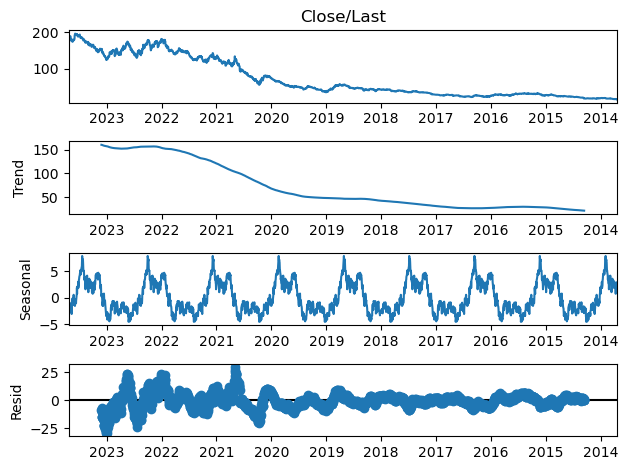

In [19]:
# Decompose the time series
decomposition = seasonal_decompose(stockDataFrame['Close/Last'], period = 300)  # you can adjust the frequency

# Plot the decomposition
decomposition.plot()
plt.show()

**Trend**: 

Generally Upwards Over Time: This suggests a bullish trend for the stock, indicating good long-term performance. Investors and analysts often look for such trends to make long-term investment decisions.
Smoother in Earlier Years: This could indicate lower volatility in the stock's earlier years. The market might have been less uncertain, or the stock might have been less influenced by external factors during that time.

**Seasonal**:

Periodic Double Peak Around New Year: This is intriguing and could be related to multiple factors like:
Tax considerations affecting buying/selling near the end of the year.
Holiday season effects, especially if it's a retail or consumer goods stock.
Quarterly or annual reports that are typically released around the new year.
This pattern could be useful for short-term trading strategies.

**Residual**:

Noise Around Zero in Earlier Years: This implies that the stock price was mostly explained by its trend and seasonality during those years.
Increased Noise After 2019: Increased noise could indicate higher volatility or more unexpected events affecting the stock. This could be due to a variety of factors, such as changes in market conditions, company performance, or broader economic indicators.

_____________

### Building a Predictive Model

Using a ARIMA Model (AutoRegressive Integrated Moving Average)

In [24]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(stockDataFrame['Close/Last'])
result

(-1.6457222166770922,
 0.45927235926409876,
 18,
 2497,
 {'1%': -3.4329715599546646,
  '5%': -2.862698190651408,
  '10%': -2.567386549839784},
 9615.266748837956)

The second value from this result tuple is the pvalue. If the pvalue is less than 0.05 then we can assume stationarity. To be stationary is to have statistical properties, such as mean, variance, and autocorrelation do not change over time. In simpler terms, the series does not exhibit trends or seasonality and fluctuates around a constant mean and variance. By observation, we can see from the trend, seasonal, and residual plots that the series fluctuates and that the pvalue can be expected to be over 0.05. The resulting value is 0.459 using the adfuller function. 

This requires that we make the data stationary by differencing the series. A common method to differencing is subtracting the pervious value from each value in the series.

Applying Differencing: 

In [31]:
stock_data_diff = stockDataFrame['Close/Last'].diff().dropna()

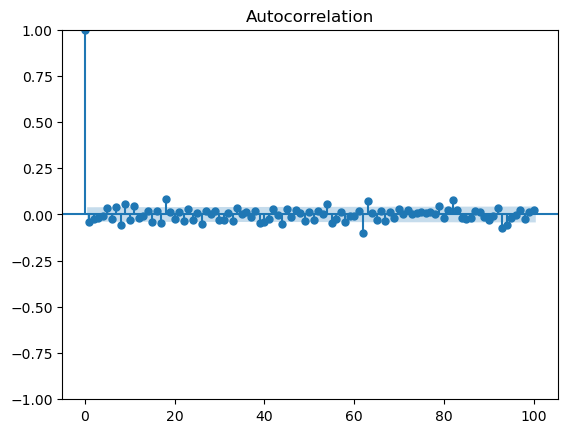

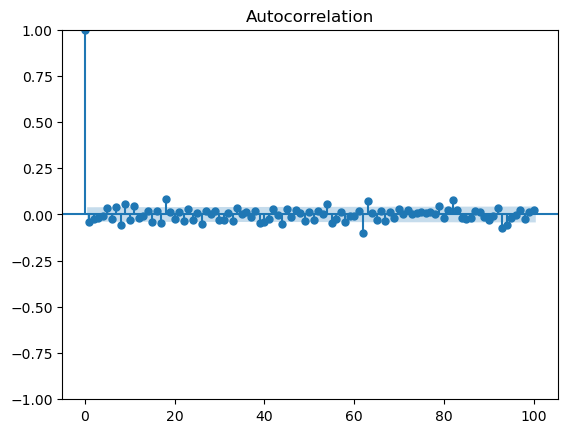

In [43]:
from statsmodels.graphics.tsaplots import plot_acf #Autocorrelation Function (ACF) plot used to find q

plot_acf(stock_data_diff, lags=100)

#### Understanding the ACF Plot:

**Lags**:

On the x-axis, you have the "lags," which are the time steps separating the observations. A lag of 1 means one time step (e.g., one day if your data is daily), a lag of 2 means two time steps, and so on.

**Correlation**: 

The y-axis shows the value of the autocorrelation function at each lag. It ranges from -1 to 1, similar to a regular correlation coefficient.

**Blue Shade**: 

The blue shaded region represents the confidence intervals. If the correlation value for a given lag falls outside this region, it's generally considered statistically significant.

#### Interpreting the ACF Plot

**Significance**:

100 lags were used and and the first lag there is a correlation of 1 whereas most lags are inside the blue shaded area. There are are about 9 more lags where they proturde out of the shaded area. 



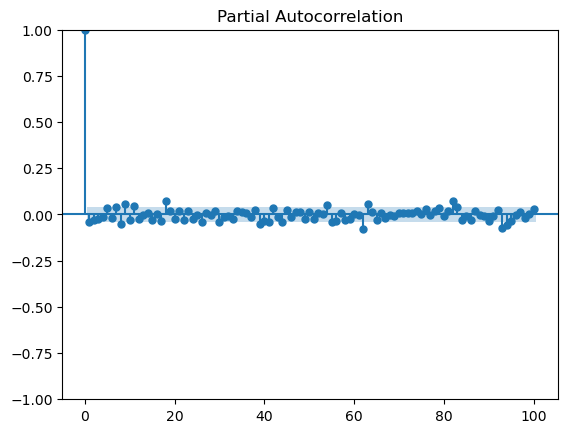

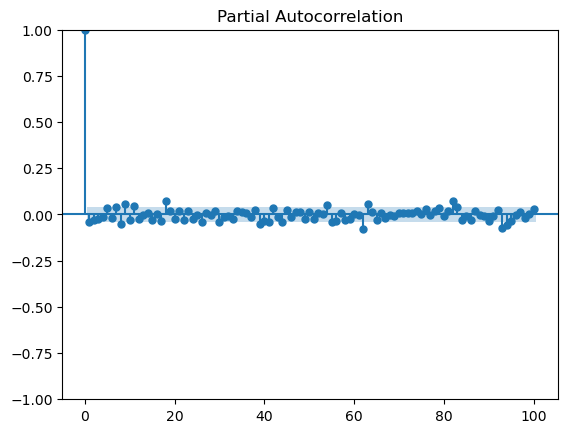

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf # Partial Autocorrelation Function (PACF) used to find p

# Plotting the PACF
plot_pacf(stock_data_diff, lags=100, method='ywm')


In [67]:
from statsmodels.tsa.arima.model import ARIMA

stock_data_diff = stock_data_diff.asfreq('B')

p = 1 # Where lag trends at zero
d = 1 # The data was differenced so value of 1
q = 1 # The sharp drop after the first lag indicates q=1
model = ARIMA(stock_data_diff, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Close/Last   No. Observations:                 2607
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4909.150
Date:                Thu, 14 Sep 2023   AIC                           9824.300
Time:                        11:52:26   BIC                           9841.897
Sample:                    09-13-2013   HQIC                          9830.675
                         - 09-11-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0368      0.011     -3.254      0.001      -0.059      -0.015
ma.L1         -0.9996      0.002   -633.052      0.000      -1.003      -0.996
sigma2         2.8999      0.038     76.349      0.0

#### Some information about the model

coef: The weight (i.e., importance) of each feature.

P>|z|: The p-value for each feature. A small p-value (< 0.05) typically indicates that the feature is important.

AIC & BIC: These are measures of the model's fit, with a lower value generally indicating a better fit.

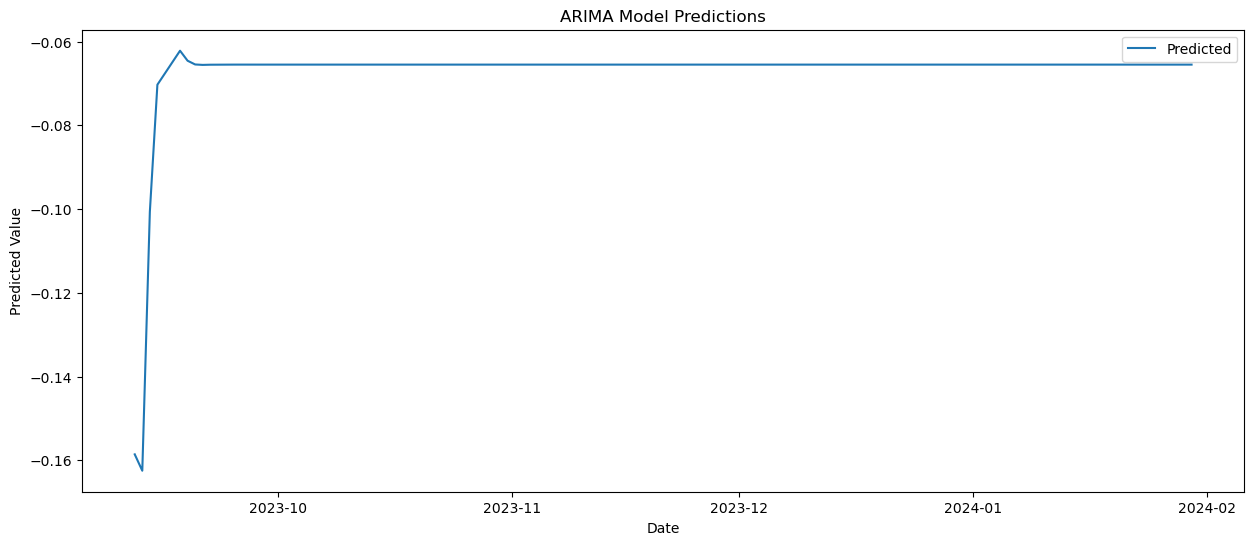

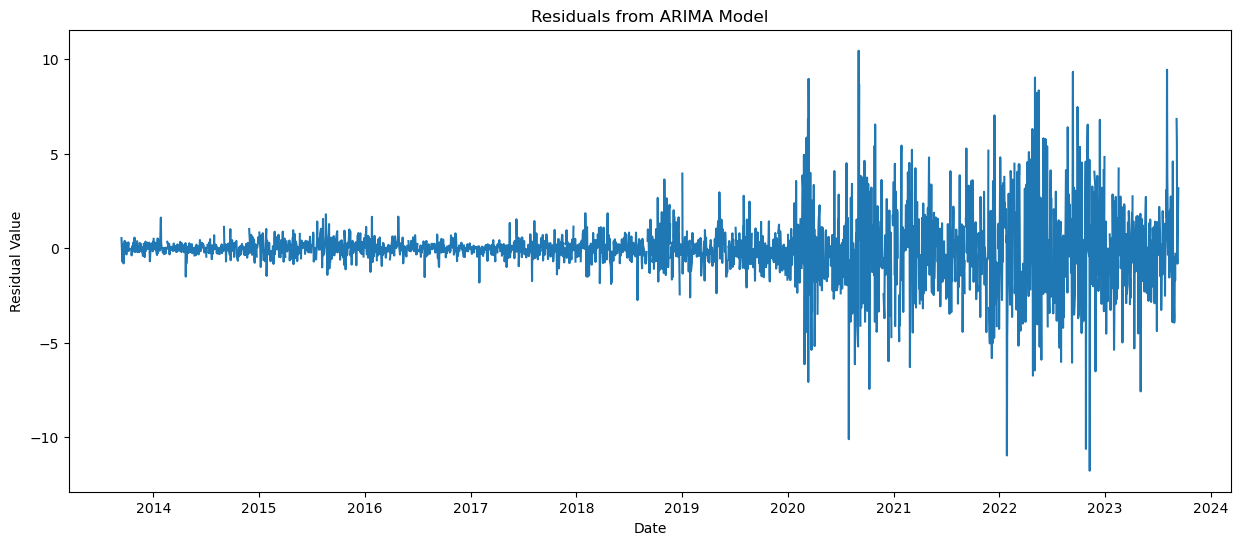

In [59]:
# Generate predictions
predictions = model_fit.predict(start=len(stock_data_diff), end=len(stock_data_diff)+100, typ='levels')

# Plotting the predicted values
plt.figure(figsize=(15, 6))
plt.plot(predictions, label='Predicted')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

# Plotting the residuals
residuals = model_fit.resid
plt.figure(figsize=(15, 6))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.show()



#### Interpreting the Plots
**Predictions Plot**:

Starts at -0.16: The model's starting prediction value.

Peaks at -0.06 and Then Remains Flat: This could indicate that the model anticipates an initial increase in the stock value before stabilizing. The "flatness" may imply that the model doesn't anticipate further major changes.
The negative predicted values could be due to the differencing operation

**Residuals Plot**:

Noise Near Zero Until 2019: This suggests that the model fits the data quite well for this period.

Broadening Noise Post-2019 and Peak at 2020-2021: This could indicate that the model is not capturing some external factors affecting the stock, or perhaps it's reflecting real-world volatility (covid) in the stock market during that time.

________

#### Refining the Plots using Seasonal ARIMA (SARIMA)

The SARIMA model has additional parameters P, D, and Q, along with a seasonal component S, which represents the seasonality period.

In [94]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define parameters
p, d, q = 4, 1, 1  # Non-seasonal parameters
P, D, Q, S = 1, 1, 1, 5  # Seasonal parameters

# Fit the model
model = SARIMAX(stock_data_diff, order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit()

# Summary statistics of the fit model
print(model_fit.summary())


                                     SARIMAX Results                                     
Dep. Variable:                        Close/Last   No. Observations:                 2607
Model:             SARIMAX(4, 1, 1)x(1, 1, 1, 5)   Log Likelihood               -4917.322
Date:                           Thu, 14 Sep 2023   AIC                           9850.644
Time:                                   12:19:53   BIC                           9897.553
Sample:                               09-13-2013   HQIC                          9867.640
                                    - 09-11-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0410      0.012     -3.465      0.001      -0.064      -0.018
ar.L2         -0.0377      0.012     -3.264

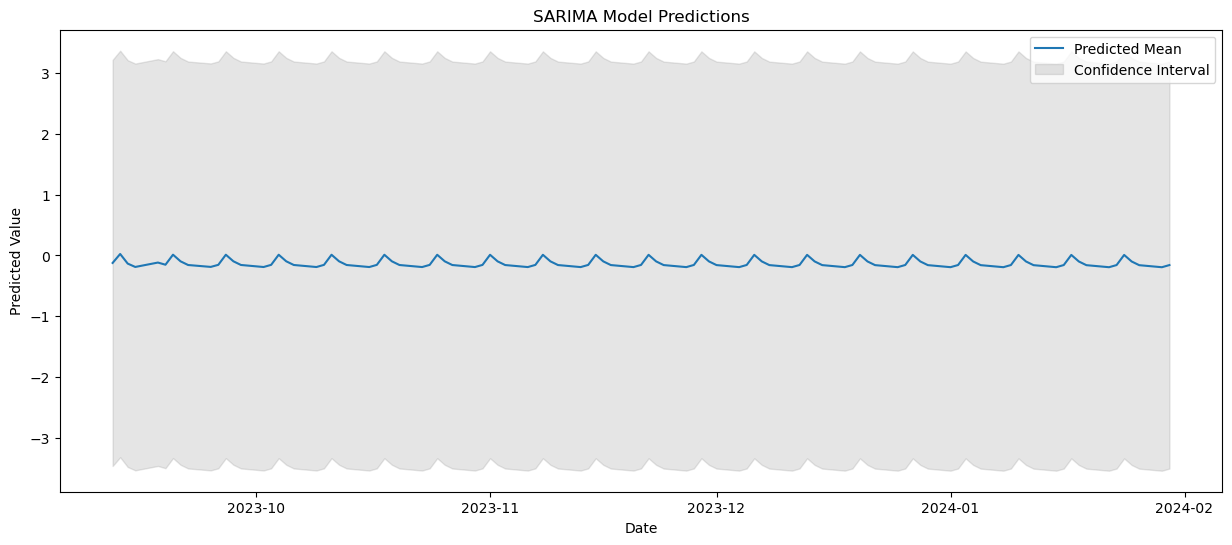

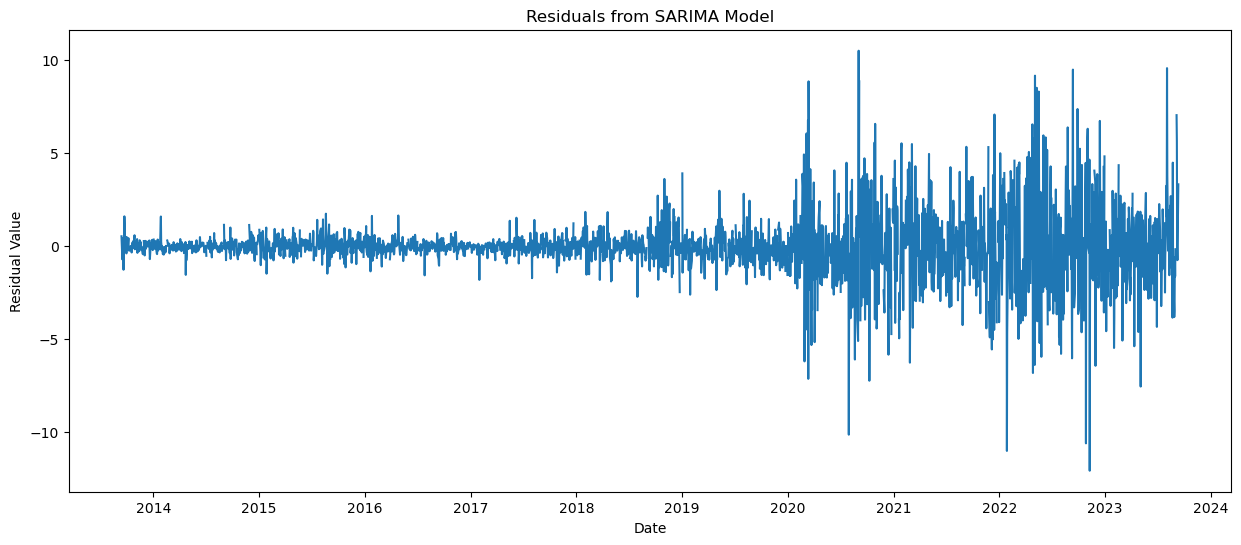

In [95]:
# Generate predictions for the next 100 days
predictions = model_fit.get_prediction(start=len(stock_data_diff), end=len(stock_data_diff)+100)
predicted_mean = predictions.predicted_mean  # Point estimates for the predicted values
predicted_ci = predictions.conf_int()  # Confidence intervals for the predicted values

# Plotting the predicted values
plt.figure(figsize=(15, 6))
plt.plot(predicted_mean, label='Predicted Mean')
plt.fill_between(predicted_ci.index, predicted_ci.iloc[:, 0], predicted_ci.iloc[:, 1], color='grey', alpha=0.2, label='Confidence Interval')
plt.title('SARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

# Plotting the residuals
residuals = model_fit.resid
plt.figure(figsize=(15, 6))
plt.plot(residuals)
plt.title('Residuals from SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.show()


#### Interperting plots

**Predicted Values**:

Periodic Peaks: The periodicity in the predicted values suggests that the model has captured some level of seasonality in the data. This is a good sign!

Confidence Interval: The wide confidence interval around zero suggests that while the model has identified some seasonality, it's not very confident about the magnitude of the fluctuations. This could be improved by further tuning the model or adding explanatory variables if possible.

**Residuals**:

Similar to ARIMA:the residuals look very similar to those from the ARIMA model, it suggests that adding seasonality didn't significantly improve the model's ability to fit the data. This could mean that either the data doesn't have a strong seasonal component, or that the seasonal parameters (P,D,Q,S) need further tuning.

In [102]:
# Align the indices
stockDataFrame.sort_index(inplace=True)
stockDataFrame['lockdown'] = 0
stockDataFrame.loc['2020-03-15':, 'lockdown'] = 1  # Assuming lockdown started on March 15, 2020

# Ensure that 'lockdown' column and stock_data_diff have the same index
lockdown_aligned = stockDataFrame['lockdown'].reindex(stock_data_diff.index, method='ffill')

# Fit the SARIMA model with the 'lockdown' column as an exogenous variable
model = SARIMAX(stock_data_diff, exog=lockdown_aligned, order=(4, 1, 1), seasonal_order=(1, 1, 1, 5))
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                        Close/Last   No. Observations:                 2607
Model:             SARIMAX(4, 1, 1)x(1, 1, 1, 5)   Log Likelihood               -4916.411
Date:                           Thu, 14 Sep 2023   AIC                           9850.823
Time:                                   12:32:04   BIC                           9903.595
Sample:                               09-13-2013   HQIC                          9869.943
                                    - 09-11-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
lockdown      -0.1512      0.084     -1.798      0.072      -0.316       0.014
ar.L1         -0.0411      0.012     -3.482

#### Interpertation of Summary

**Lockdown Coefficient**: The coefficient for the 'lockdown' variable is −0.1512, and the p-value is 0.072, which is slightly above the common significance level of 0.05. This suggests that the 'lockdown' variable may not be statistically significant, but it's quite close.

**AR and MA Coefficients**: Similar to the previous models, the AutoRegressive (AR) and Moving Average (MA) coefficients are listed. The AR terms at lags 1 and 2 appear to be significant, given their p-values are less than0.05.

**Seasonal Terms**: Both seasonal terms have p-values that are close to or below 0.05, indicating that they are likely significant.

**Ljung-Box Test**: The Ljung-Box test gives a p-value of 0.99, indicating that we fail to reject the null hypothesis that the residuals are independently distributed.

**Jarque-Bera Test**: The Jarque-Bera test has a p-value close to zero, indicating that the residuals are not normally distributed.

**Heteroskedasticity**: The test indicates that the residuals have varying variance (heteroskedasticity), which could be a concern for some types of analysis.

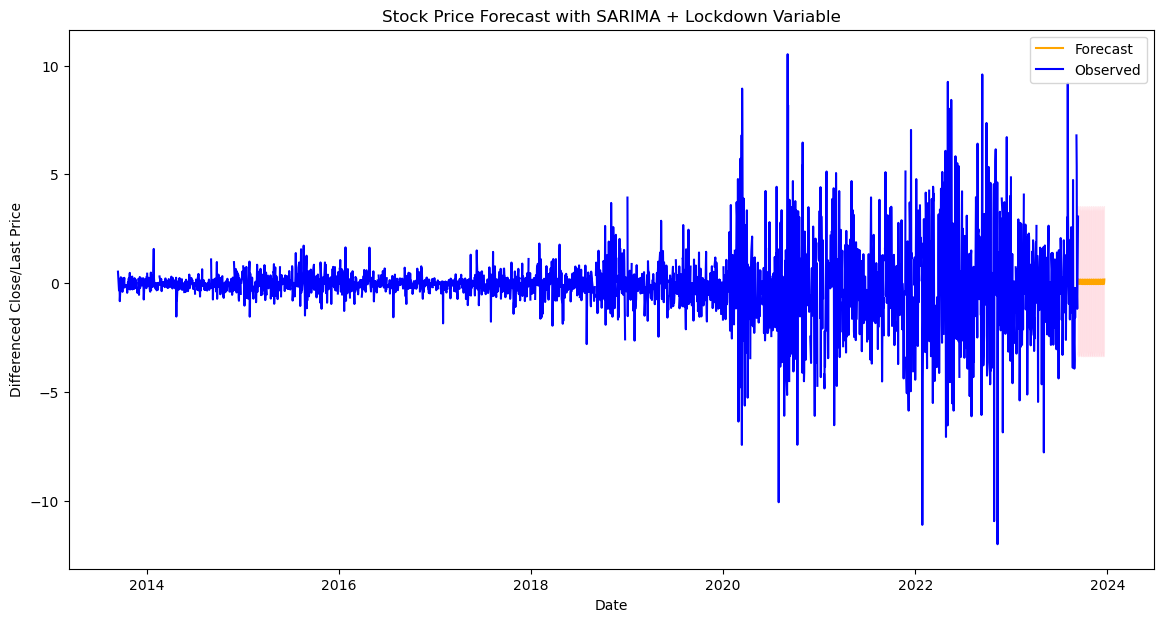

In [106]:
# Generate predictions for the next 100 days
import numpy as np
n_forecast = 100  # Number of days to forecast

# Forecast
forecast_values = model_fit.get_forecast(steps=n_forecast, exog=np.full((n_forecast, 1), 0))  # Assuming no lockdown in the forecast period
mean_forecast = forecast_values.predicted_mean
conf_int = forecast_values.conf_int()

# Make the time index for the forecast values
forecast_index = pd.date_range(stock_data_diff.index[-1], periods=n_forecast+1)

# Create a DataFrame for the forecast and the confidence interval
forecast_df = pd.DataFrame({'Predicted': mean_forecast}, index=forecast_index)
conf_int_df = pd.DataFrame(conf_int, index=forecast_index)

# Plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))

# Plot the forecast
plt.plot(forecast_df.index, forecast_df['Predicted'], label='Forecast', color='orange')

# Plot the past data
plt.plot(stock_data_diff.index, stock_data_diff, label='Observed', color='blue')

# Plot the confidence intervals
plt.fill_between(conf_int_df.index, conf_int_df.iloc[:, 0], conf_int_df.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Differenced Close/Last Price')
plt.title('Stock Price Forecast with SARIMA + Lockdown Variable')
plt.legend()
plt.show()


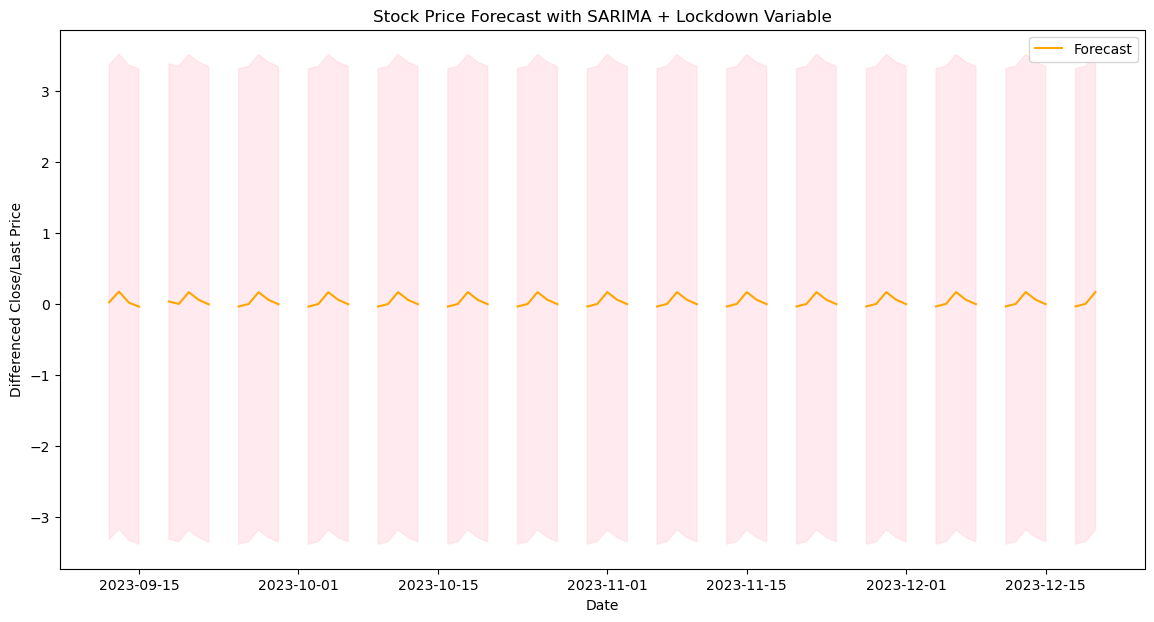

In [107]:
# Plotting only the forecast results
plt.figure(figsize=(14, 7))

# Plot the forecast
plt.plot(forecast_df.index, forecast_df['Predicted'], label='Forecast', color='orange')

# Plot the confidence intervals
plt.fill_between(conf_int_df.index, conf_int_df.iloc[:, 0], conf_int_df.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Differenced Close/Last Price')
plt.title('Stock Price Forecast with SARIMA + Lockdown Variable')
plt.legend()
plt.show()


# Stock Price Forecasting Summary

## SARIMA Model

### Predicted Values
- The forecast line is close to zero, indicating that the model predicts little to no change in the differenced stock prices. This could imply that the stock is expected to remain relatively stable.

### Confidence Intervals
- The confidence intervals are relatively wide, suggesting a high level of uncertainty in the forecast.

---

## SARIMA + Lockdown Variable Model

### Predicted Values
- Similar to the SARIMA model, the forecast line is close to zero. Adding a lockdown variable did not seem to substantially alter the forecast. This suggests that the lockdown period is not a significant predictor of stock prices.

### Confidence Intervals
- The confidence intervals are extremely wide, indicating an even greater level of uncertainty when the lockdown variable is included. This suggests that the lockdown variable may add more noise than valuable information to the model.

### Periodic Gaps on X-Axis
- If there are periodic gaps in the forecast, this could be due to the seasonality parameter in the SARIMA model or issues with the data's time index.

### Wide Spanning of Y-Axis in Confidence Intervals
- The confidence intervals span the entire Y-axis, indicating a lack of confidence in the prediction. This is not ideal for making actionable insights.

---

## General Observations

- Both models indicate high uncertainty in the forecasts, as evidenced by the wide confidence intervals.
  
- The addition of the lockdown variable did not significantly improve the model's predictive power. This could mean that other variables or a different type of model may be needed for more accurate forecasting.



____________